In [1]:
from opensimplex import OpenSimplex
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point, LineString
from shapely.ops import polygonize, unary_union
import random
from descartes import PolygonPatch

%matplotlib inline

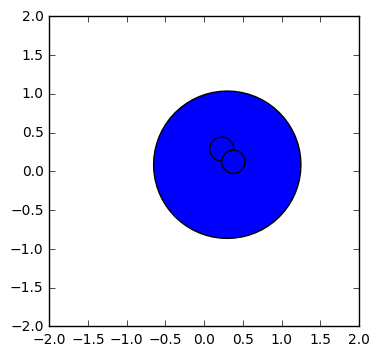

In [2]:
points = [Point(random.random(),random.random()).buffer(random.random()) for x in range(0,3)]

ax = plt.subplot(1,1,1)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_aspect('equal')

for p in points:
    ax.add_patch(PolygonPatch(p))

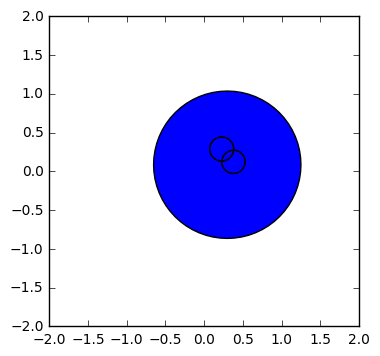

In [3]:
rings = [LineString(pol.exterior.coords) for pol in points]
union = unary_union(rings)
result = [geom for geom in polygonize(union)]

ax = plt.subplot(1,1,1)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_aspect('equal')

for r in result:
    ax.add_patch(PolygonPatch(r))

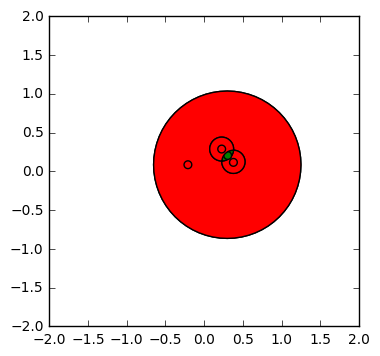

In [4]:
ax = plt.subplot(1,1,1)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_aspect('equal')

for r in result:
    ax.add_patch(PolygonPatch(r))

centroids = [p.representative_point() for p in result]

finals = list()

for res,c in zip(result,centroids):
    checks = list()
    for p in points:
        if c.within(p):
            checks.append(True)
        else:
            checks.append(False)
    if False in checks:
        rgb = 'red'
    else:
        rgb = 'green'
        finals.append(res)
    
    ax.add_patch(PolygonPatch(res,facecolor=rgb))
    ax.add_patch(PolygonPatch(c.buffer(0.05),facecolor=rgb))

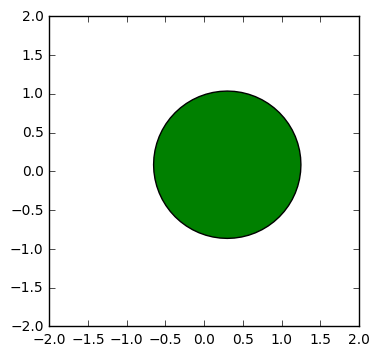

In [5]:
ax = plt.subplot(1,1,1)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_aspect('equal')

for p in points:
    checks = list()
    for c in centroids:
        checks.append(c.within(p))
    if False not in checks:
        ax.add_patch(PolygonPatch(p,facecolor='green'))

In [6]:
from cycsat.geometry import intersect

In [7]:
a = intersect(points)

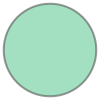

In [8]:
a